#CIFAR-10:

Model: MLP (Multilayer Precepton) neural network model.

Aim: To build a MLP supervised classification model with Keras.


In [0]:
# About CIFAR-10 Dataset:

# Detail description will be available at http://www.cs.utoronto.ca/~kriz/cifar.html

# The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

# The dataset is divided into five training batches and one test batch, each with 10000 images. 

# The test batch contains exactly 1000 randomly-selected images from each class. 

# The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. 

# Between them, the training batches contain exactly 5000 images from each class

In [0]:
# Getting CIFAR-10 Dataset

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt


In [4]:
# Split CIFAR-10 dataset into Training and Testing sets

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [0]:
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [11]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [0]:
batch_size = 128
num_classes = 10
epochs = 20

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
#model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.33)
                    #validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 86us/step - loss: 2.1955 - acc: 0.2672 - val_loss: 1.8525 - val_acc: 0.3295
Epoch 2/20
50000/50000 [==============================] - 4s 74us/step - loss: 1.7681 - acc: 0.3638 - val_loss: 1.7636 - val_acc: 0.3649
Epoch 3/20
50000/50000 [==============================] - 4s 74us/step - loss: 1.6783 - acc: 0.3995 - val_loss: 1.6329 - val_acc: 0.4228
Epoch 4/20
50000/50000 [==============================] - 4s 75us/step - loss: 1.6090 - acc: 0.4258 - val_loss: 1.5400 - val_acc: 0.4541
Epoch 5/20
50000/50000 [==============================] - 4s 76us/step - loss: 1.5577 - acc: 0.4447 - val_loss: 1.6006 - val_acc: 0.4407
Epoch 6/20
50000/50000 [==============================] - 4s 76us/step - loss: 1.5207 - acc: 0.4595 - val_loss: 1.7044 - val_acc: 0.4121
Epoch 7/20
50000/50000 [==============================] - 4s 76us/step - loss: 1.4839 - acc: 0.4730 - val_loss: 1.6202 - val_acc

# Comments:
By using simple MLP model with 2 dense layers of 512 neurons each we got Training accuracy of 0.5729 and Validation accuracy of 0.4750. This means that our model is underfit.

Before going to test the model lets try to increase the accuracy of the model.

Model underfitting can be avoided by following means:
1. To increase the complexity of the model
2. 

In [0]:
model1 = Sequential()
model1.add(Dense(512, activation='relu', input_shape=(3072,)))
#model1.add(Dropout(0.2))
model1.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model1.add(Dense(num_classes, activation='softmax'))

In [25]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [0]:
model1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [30]:
history = model1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.10)
                    #validation_data=(x_test, y_test))

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 4s 85us/step - loss: 1.0833 - acc: 0.6203 - val_loss: 1.6054 - val_acc: 0.5056
Epoch 2/20
45000/45000 [==============================] - 4s 81us/step - loss: 1.0540 - acc: 0.6294 - val_loss: 1.7039 - val_acc: 0.4890
Epoch 3/20
45000/45000 [==============================] - 4s 81us/step - loss: 1.0410 - acc: 0.6355 - val_loss: 1.8376 - val_acc: 0.4876
Epoch 4/20
45000/45000 [==============================] - 4s 81us/step - loss: 1.0300 - acc: 0.6352 - val_loss: 1.8989 - val_acc: 0.4758
Epoch 5/20
45000/45000 [==============================] - 4s 79us/step - loss: 1.0211 - acc: 0.6404 - val_loss: 1.9841 - val_acc: 0.4542
Epoch 6/20
45000/45000 [==============================] - 4s 79us/step - loss: 1.0132 - acc: 0.6401 - val_loss: 1.7234 - val_acc: 0.4958
Epoch 7/20
45000/45000 [==============================] - 3s 78us/step - loss: 1.0012 - acc: 0.6484 - val_loss: 1.7640 - val_acc:

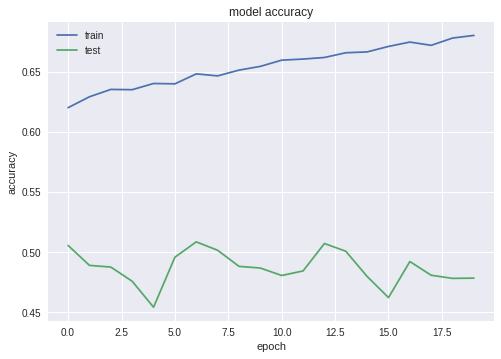

In [32]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Comments:
1. The model accuracy is not good.
2. Lets increase the complexity of the model

In [0]:
model2 = Sequential()
model2.add(Dense(512, activation='relu', input_shape=(3072,)))
#model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))

In [0]:
model2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [41]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model2.fit(x_train, y_train,
                    batch_size=10,
                    epochs=20,
                    verbose=1,
                    #validation_split=0.10)
                    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 44s 885us/step - loss: 1.8128 - acc: 0.3546 - val_loss: 1.7926 - val_acc: 0.3562
Epoch 2/20
50000/50000 [==============================] - 44s 877us/step - loss: 1.7903 - acc: 0.3658 - val_loss: 1.7512 - val_acc: 0.3833
Epoch 3/20
50000/50000 [==============================] - 44s 872us/step - loss: 1.7853 - acc: 0.3692 - val_loss: 1.7262 - val_acc: 0.3838
Epoch 4/20
50000/50000 [==============================] - 44s 881us/step - loss: 1.7863 - acc: 0.3713 - val_loss: 1.7227 - val_acc: 0.3840
Epoch 5/20
50000/50000 [==============================] - 44s 879us/step - loss: 1.7917 - acc: 0.3692 - val_loss: 1.7510 - val_acc: 0.3743
Epoch 6/20
50000/50000 [==============================] - 44s 884us/step - loss: 1.7907 - acc: 0.3718 - val_loss: 1.8116 - val_acc: 0.3632
Epoch 7/20
50000/50000 [==============================] - 43s 864us/step - loss: 1.8013 - acc: 0.3756 - val_loss: 1.

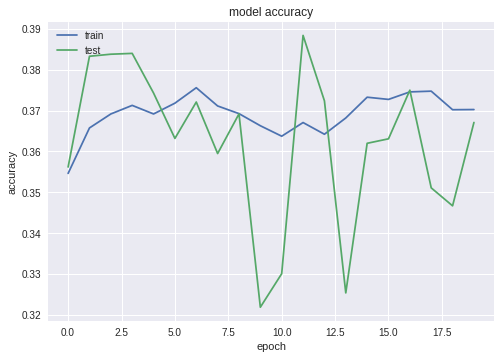

In [44]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()